# MNIST digits dataset

- First load and view the MNIST digits dataset
- There are 60000 images in this dataset, but we will only view the first 25 of them:


test_images shape (10000, 28, 28) train_images shape (60000, 28, 28)


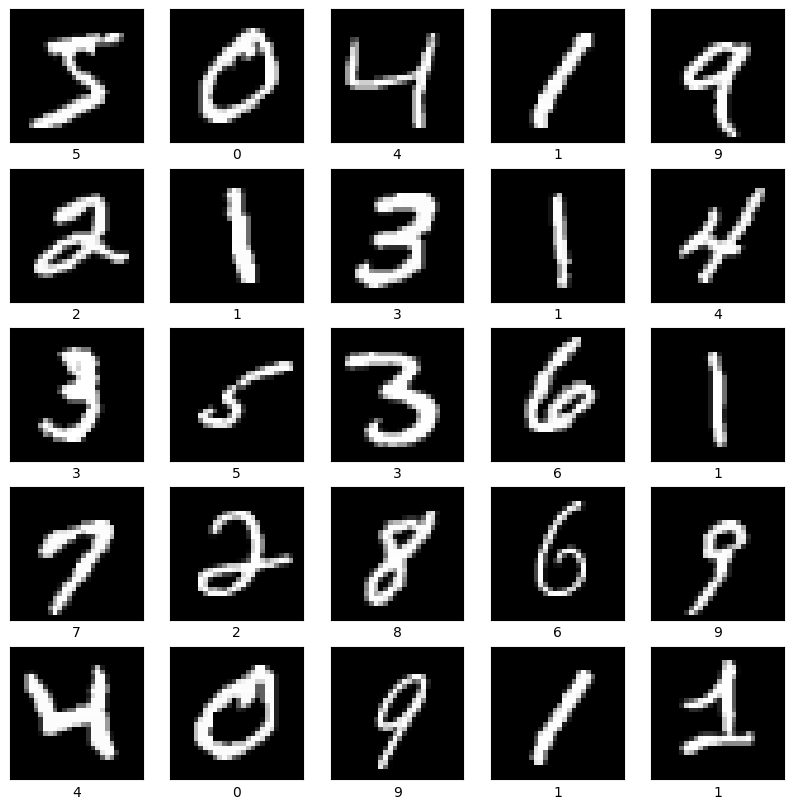

In [2]:
# Load and visualise the MNIST digits
import tensorflow as tf
tf.config.experimental.set_visible_devices([], "GPU")

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0),(test_images0, test_labels0) = mnist.load_data()

print("test_images shape",test_images0.shape,"train_images shape",train_images0.shape)
class_names=["0","1","2","3","4","5","6","7","8","9"]
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Add a label underneath...
    plt.xlabel(class_names[train_labels0[i]])
plt.show()

### Next build a neural-network classifier for these digits.

- We will build a keras model, with the higher-level API concepts

In [3]:
from tensorflow import keras
# Each MNIST images are 28*28.  Therefore if there are N images, then the
# shape of the numpy array holding the images is N*28*28
# We will reshape that here to be N*784, using a numpy reshape.
# Note that this flattens each image into a single vector length 784.
test_images=test_images0.reshape(10000,784) # 10000 test patterns
train_images=train_images0.reshape(60000,784) # 60000 train patterns

# Also rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=test_images/255.0
train_images=train_images/255.0

# Create the model

keras_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax')
])

keras_model.build(input_shape=[None,784])

## View the keras model summary information

- This shows you how many layers your neural network has, and how many weights, etc.

In [8]:
# View the model summary information...
keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Train the Keras model

- We will use SGD optimiser (ordinary gradient descent)
- We will use Cross Entropy loss ("SparseCategoricalCrossentropy")
- We will run 200 training iterations (epochs)...

In [4]:
keras_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=len(train_images),
    epochs=200,
    validation_data=(test_images, test_labels0),
)

Epoch 1/200



f:\KTU\Neuroninių tinklų metodai\venv\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 3s 3s/step - loss: 2.3981 - sparse_categorical_accuracy: 0.1408 - val_loss: 2.3445 - val_sparse_categorical_accuracy: 0.1587
Epoch 2/200
1/1 [==============================] - 0s 104ms/step - loss: 2.3408 - sparse_categorical_accuracy: 0.1616 - val_loss: 2.2886 - val_sparse_categorical_accuracy: 0.1820
Epoch 3/200
1/1 [==============================] - 0s 90ms/step - loss: 2.2859 - sparse_categorical_accuracy: 0.1848 - val_loss: 2.2350 - val_sparse_categorical_accuracy: 0.2089
Epoch 4/200
1/1 [==============================] - 0s 95ms/step - loss: 2.2332 - sparse_categorical_accuracy: 0.2104 - val_loss: 2.1834 - val_sparse_categorical_accuracy: 0.2361
Epoch 5/200
1/1 [==============================] - 0s 90ms/step - loss: 2.1824 - sparse_categorical_accuracy: 0.2393 - val_loss: 2.1336 - val_sparse_categorical_accuracy: 0.2635
Epoch 6/200
1/1 [==============================] - 0s 95ms/step - loss: 2.1335 - sparse_categorical_accuracy: 0.2682 - val_

## View the training performance

- When the Keras fit loop runs, it returns a "history" object, which includes a dictionary of the trianing history.

- Hence we can plot graphs of the training performance (Accuracy, Loss), for both the "Training" and "Validation" sets....

In [6]:
# first show keys for data series recorded by fit loop:
for item in history.history:
    print("Key:",item)

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


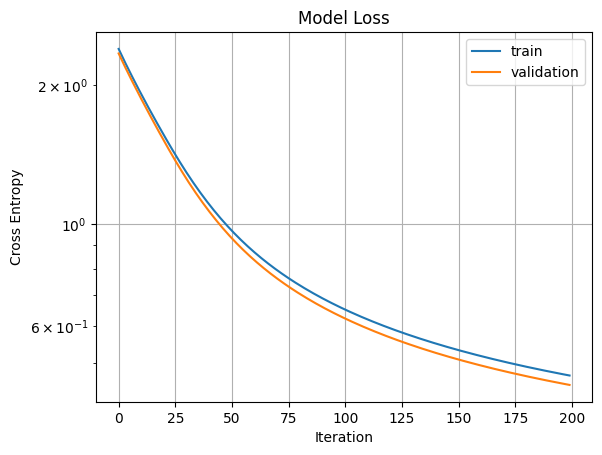

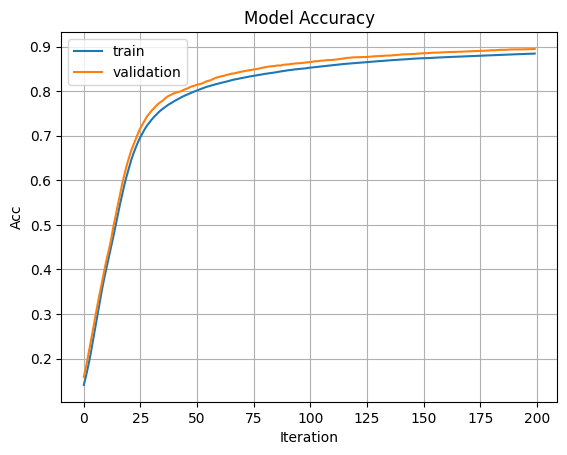

In [5]:

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()


## Inspect how well the system is working on a sample of 25 new images (from the test set)...
- The test set has a lot of images in it, but we can only view 25 at a time.
- Hence rerun this code block several times, to get a different random set of samples from the test set

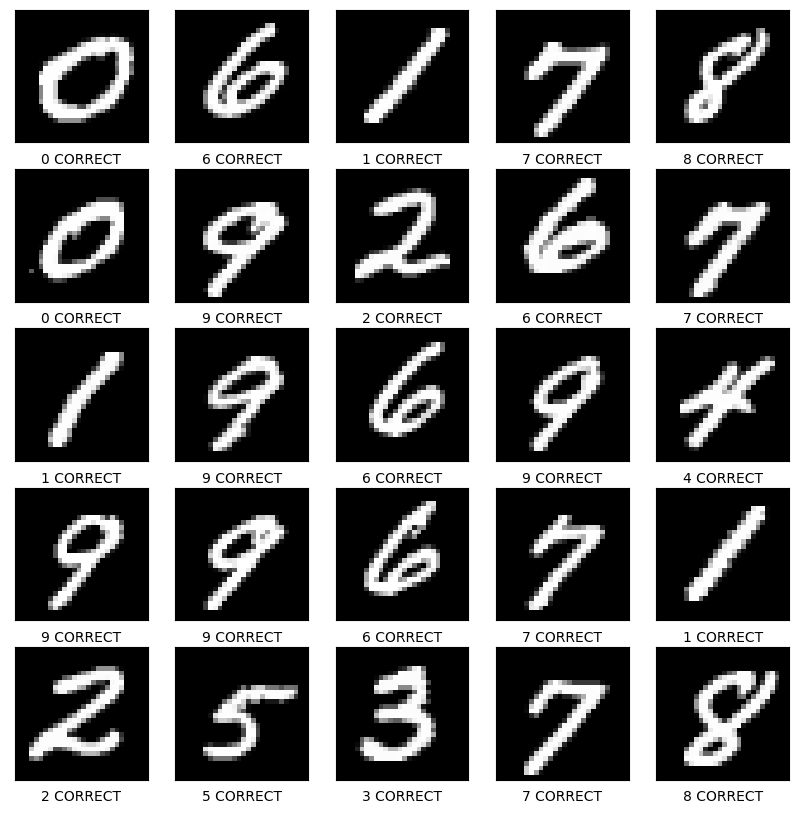

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        prediction=keras_model(test_images[i:i+1])[0,:] # This will be a vector of length 10
        prediction_class=np.argmax(prediction)  # Pick the index of the largest element of the length-10 vector
        # Add a label underneath...
        true_label=test_labels0[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()